In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\Owner`


In [2]:
Pkg.add("Plots")
Pkg.add("Optimization")
Pkg.add("OptimizationOptimJL")
Pkg.add("ForwardDiff")

    Updating registry at `C:\Users\Owner\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Owner\Project.toml`
  No Changes to `C:\Users\Owner\Manifest.toml`


In [3]:
using Plots
using Optimization
using OptimizationOptimJL
using ForwardDiff

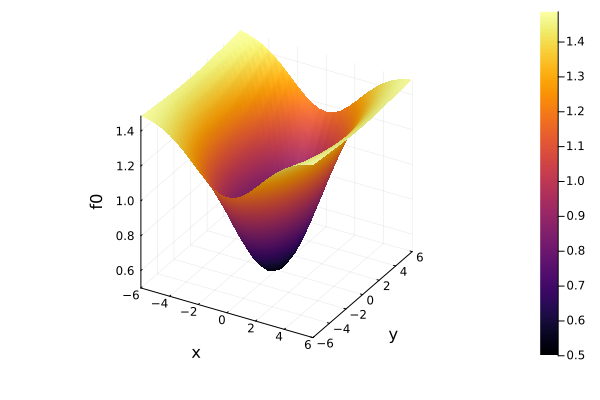

In [4]:
h = 0.5
xs = collect(-6:h:6)
ys = collect(-6:h:6)
X = [x for x = xs for _ = ys]
Y = [y for _ = xs for y = ys]

f0(x,y) = 1.5 - 1.0*exp(-0.03*(3*x^2+y^2))
Z = ((x,y) -> begin
        f0(x,y)
    end)

surface(X, Y, Z.(X,Y), xlabel = "x", ylabel = "y", zlabel = "f0")

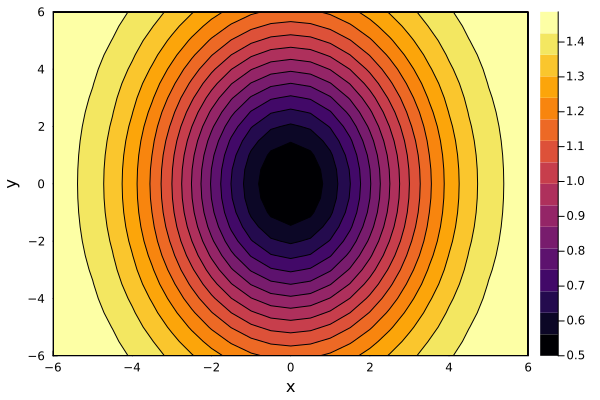

In [5]:
contourf(xs, ys, f0, xlabel = "x", ylabel = "y", zlabel = "f0")

In [6]:
f(x,y) = 1.5-1.6*exp(-0.05*(3*(x+3).^2+(y+3).^2))
fs(x,y) = f(x,y) + (0.5-exp(-0.1*(3*(x-3).^2+(y-3).^2)))

fs (generic function with 1 method)

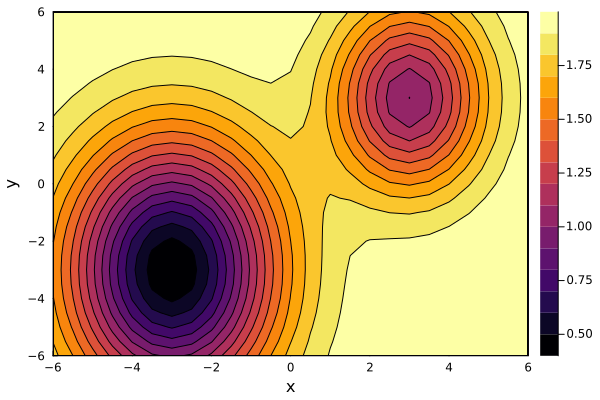

In [7]:
contourf(xs, ys, fs, xlabel = "x", ylabel = "y", zlabel = "f0",aspect=:equal)

In [8]:
# Gradient Decent
fquad(x,y) = x^2 + 3*y^2

fquad (generic function with 1 method)

In [9]:
xc = [3.0]
yc = [2.0]
fc = [fquad(3.0,2.0)]
for j in 1:10
    del = (xc[end]^2 + 9*yc[end]^2)/(2*xc[end] + 54*yc[end]^2)
    push!(xc,(1-2*del)*xc[end])
    push!(yc,(1-6*del)*yc[end])
    push!(fc,fquad(xc[end],yc[end]))

    if abs(fc[end]-fc[end-1])<1e-6
        break
    end
end

In [10]:
collect(zip(xc, yc))

11-element Vector{Tuple{Float64, Float64}}:
 (3.0, 2.0)
 (1.7837837837837835, -0.43243243243243246)
 (0.5137388832064905, 0.4912365861692354)
 (0.33571884365332627, -0.01943114421935184)
 (0.2230353037547772, 0.0001349613744421102)
 (0.1732905027900615, 4.4657822539913496e-5)
 (0.14326089581505838, 2.144148631303372e-5)
 (0.12273720918597388, 1.2226305643245116e-5)
 (0.10767278581724037, 7.7244374893187e-6)
 (0.09607935664805428, 5.2293023010393166e-6)
 (0.08684811369897824, 3.7220182700309583e-6)

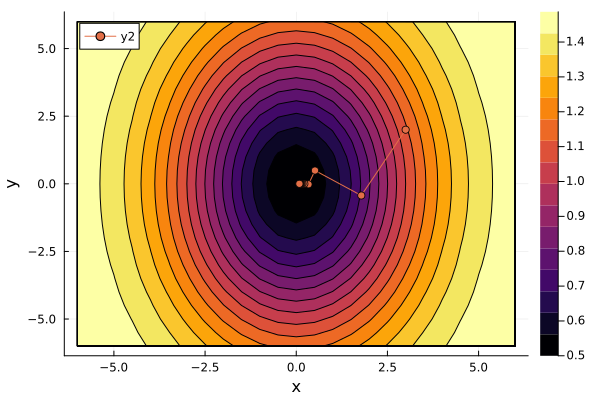

In [11]:
contourf(xs, ys, f0, xlabel = "x", ylabel = "y", zlabel = "f0")
plot!(xc, yc, markershape = :circle, aspect=:equal)

In [50]:
using Optimization, OptimizationOptimJL, ForwardDiff

# Define the objective function that takes (u, p) arguments
function f0_vec(u, p)
    x, y = u  # Extract x and y from the state vector u
    return x^2 + 3*y^2  # Example function
end

min_number = []
function callback(result, val)
    push!(min_number, result.u)
    return false
end

# Initial guess for [x, y]
initial_guess = [3.0, 2.0]

# Wrap the function as an OptimizationFunction, using AutoForwardDiff() for gradient calculation
f1 = OptimizationFunction(f0_vec, AutoForwardDiff())

# Create the optimization problem with the objective function, initial guess, and params
f2 = OptimizationProblem(f1, initial_guess)

# Solve the optimization problem using gradient descent
result = solve(f2, OptimizationOptimJL.GradientDescent(), callback=callback)

retcode: Success
u: 2-element Vector{Float64}:
  1.6114282515494192e-9
 -2.6857137525823675e-10

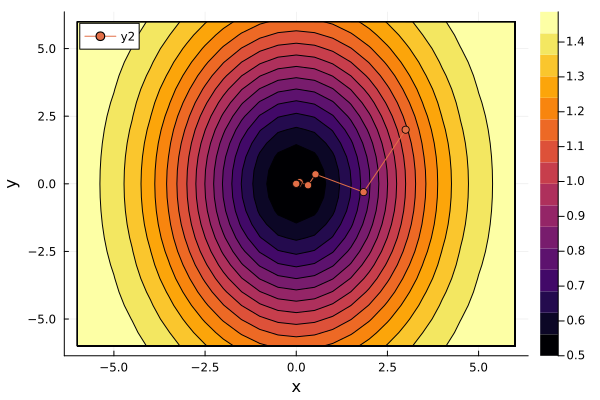

In [51]:
optx = [op[1] for op in min_number]
opty = [op[2] for op in min_number]
collect(zip(optx, opty))
contourf(xs, ys, f0, xlabel = "x", ylabel = "y", zlabel = "f0")
plot!(optx, opty, markershape = :circle, aspect=:equal)

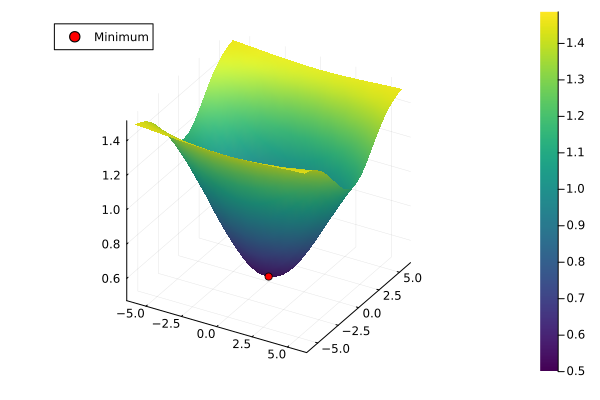

In [52]:
using Plots

# Evaluate Z values for the surface
Z_values = [f0(x, y) for x in xs, y in ys]

# Plot the surface
surface(xs, ys, Z_values, label="Surface", color=:viridis)

# Mark the minimum point found by Descent
scatter!([optimal_solution[1]], [optimal_solution[2]], [f0_vec(optimal_solution)], label="Minimum", color=:red, marker=:circle)